# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [66]:
df = pd.read_csv('churn.csv')
df = df.drop('customerID',axis=1)

In [67]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Understanding the data

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [69]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Manipulation

In [71]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
encode = OrdinalEncoder()

In [73]:
oe = encode.fit_transform(df[['gender']])

In [74]:
df['gender'] = oe

In [75]:
df[['Partner','Dependents']]

,Partner,Dependents
0,Yes,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
7038,Yes,Yes
7039,Yes,Yes
7040,Yes,Yes
7041,Yes,No


In [76]:
oe = encode.fit_transform(df[['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                             'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                             'PaperlessBilling','PaymentMethod','Churn']])

In [77]:
df[['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                             'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                             'PaperlessBilling','PaymentMethod','Churn']] = oe

In [78]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [79]:
df = df.dropna()

In [80]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


### Data Visualization

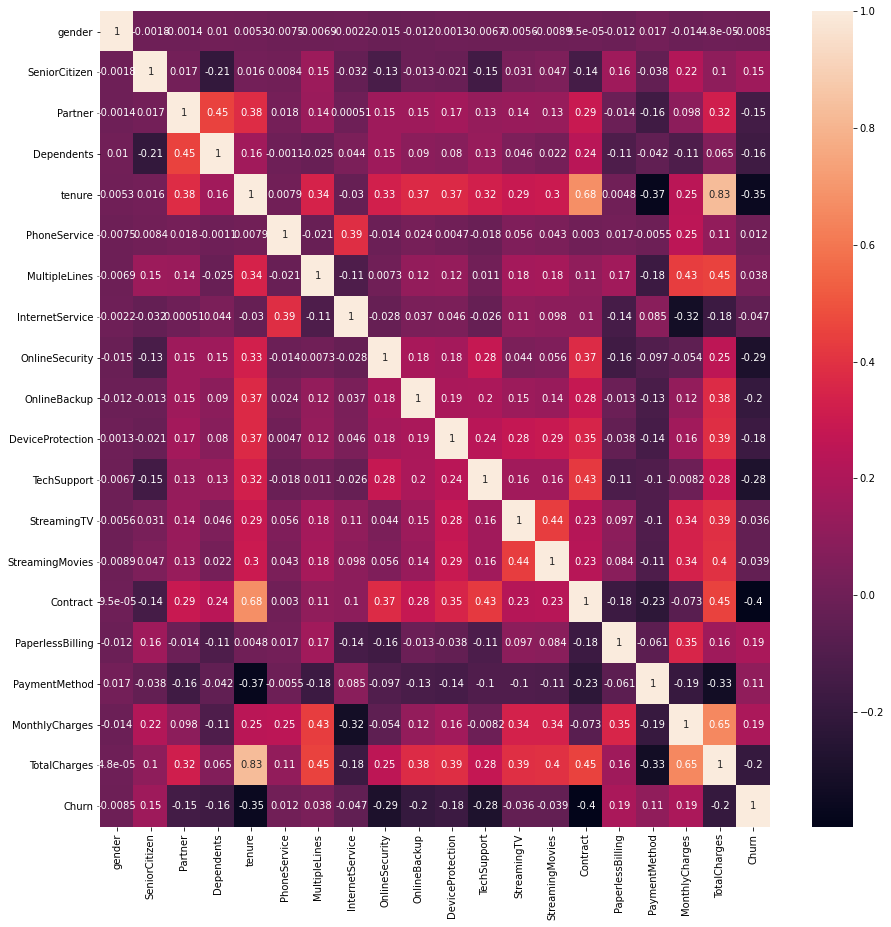

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

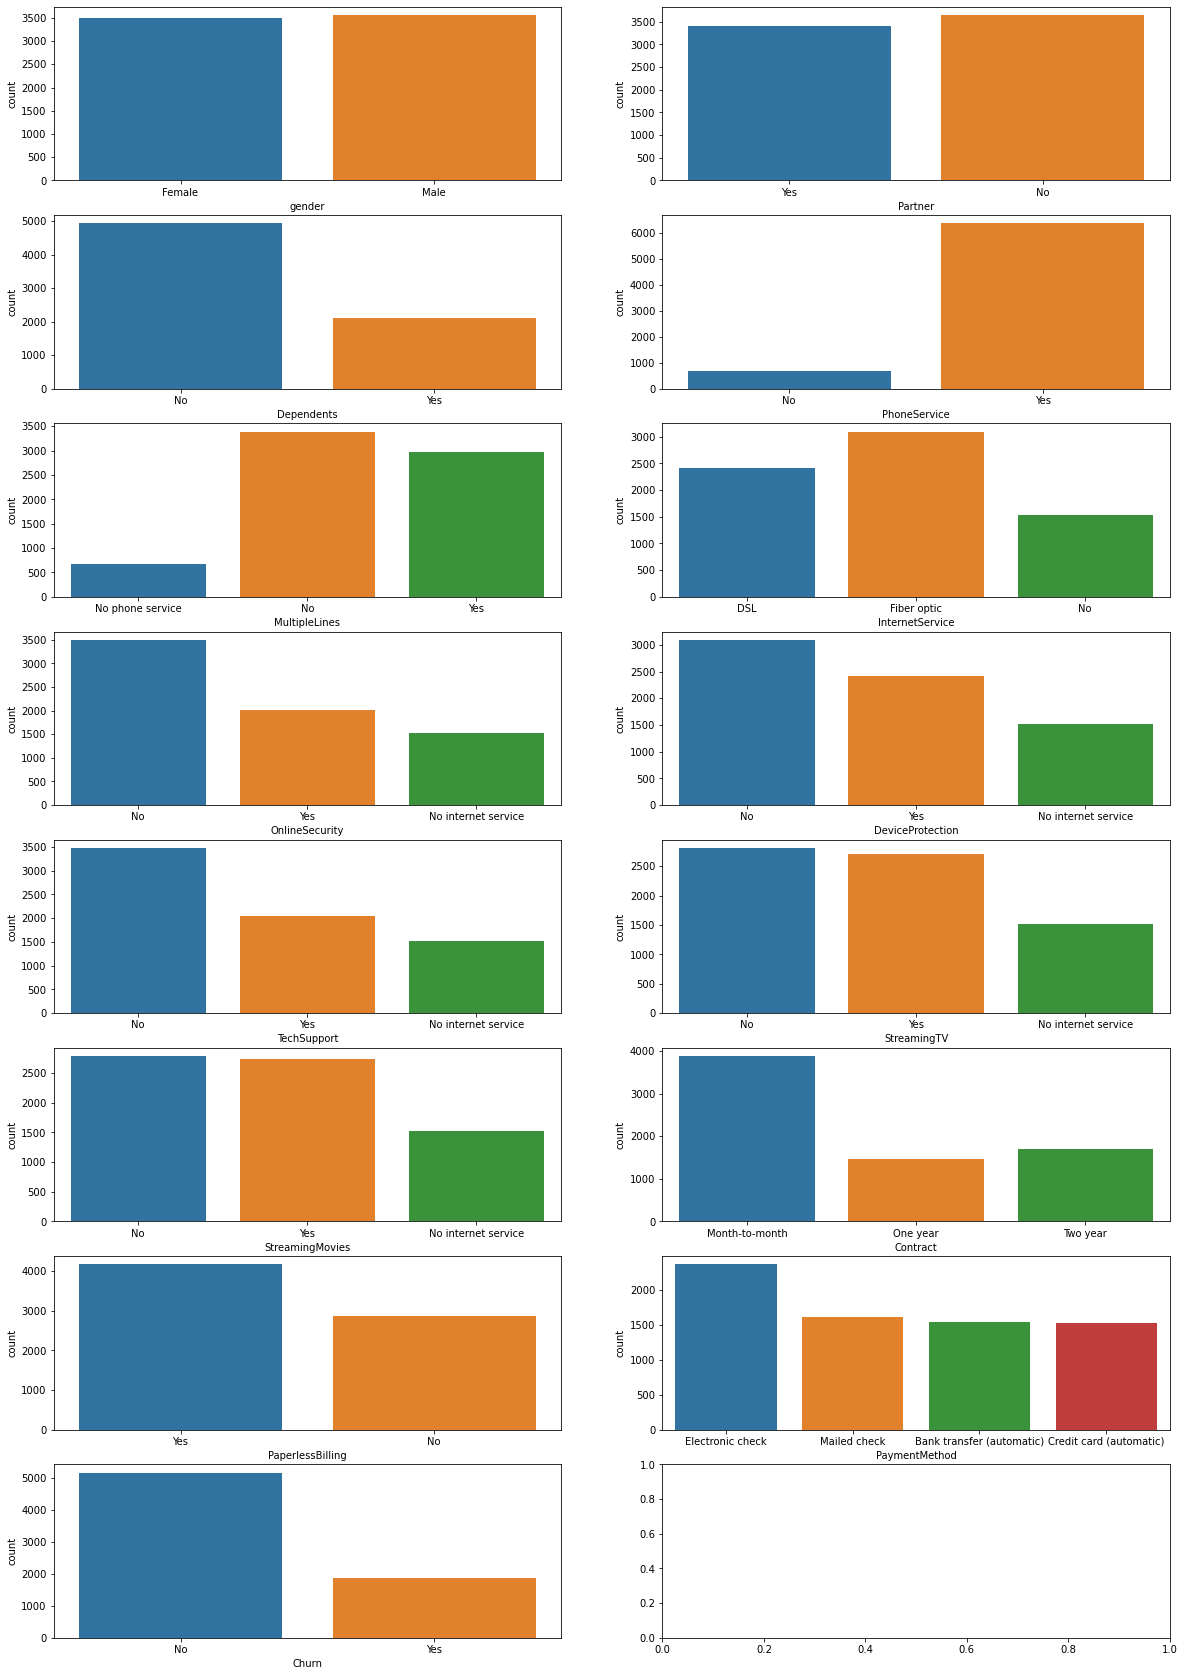

In [82]:
data = pd.read_csv('churn.csv')
fig, ax = plt.subplots(8,2, figsize=(20,30))
sns.countplot(data['gender'],ax=ax[0,0])
sns.countplot(data['Partner'],ax=ax[0,1])
sns.countplot(data['Dependents'],ax=ax[1,0])
sns.countplot(data['PhoneService'],ax=ax[1,1])
sns.countplot(data['MultipleLines'],ax=ax[2,0])
sns.countplot(data['InternetService'],ax=ax[2,1])
sns.countplot(data['OnlineSecurity'],ax=ax[3,0])
sns.countplot(data['DeviceProtection'],ax=ax[3,1])
sns.countplot(data['TechSupport'],ax=ax[4,0])
sns.countplot(data['StreamingTV'],ax=ax[4,1])
sns.countplot(data['StreamingMovies'],ax=ax[5,0])
sns.countplot(data['Contract'],ax=ax[5,1])
sns.countplot(data['PaperlessBilling'],ax=ax[6,0])
sns.countplot(data['PaymentMethod'],ax=ax[6,1])
sns.countplot(data['Churn'],ax=ax[7,0])

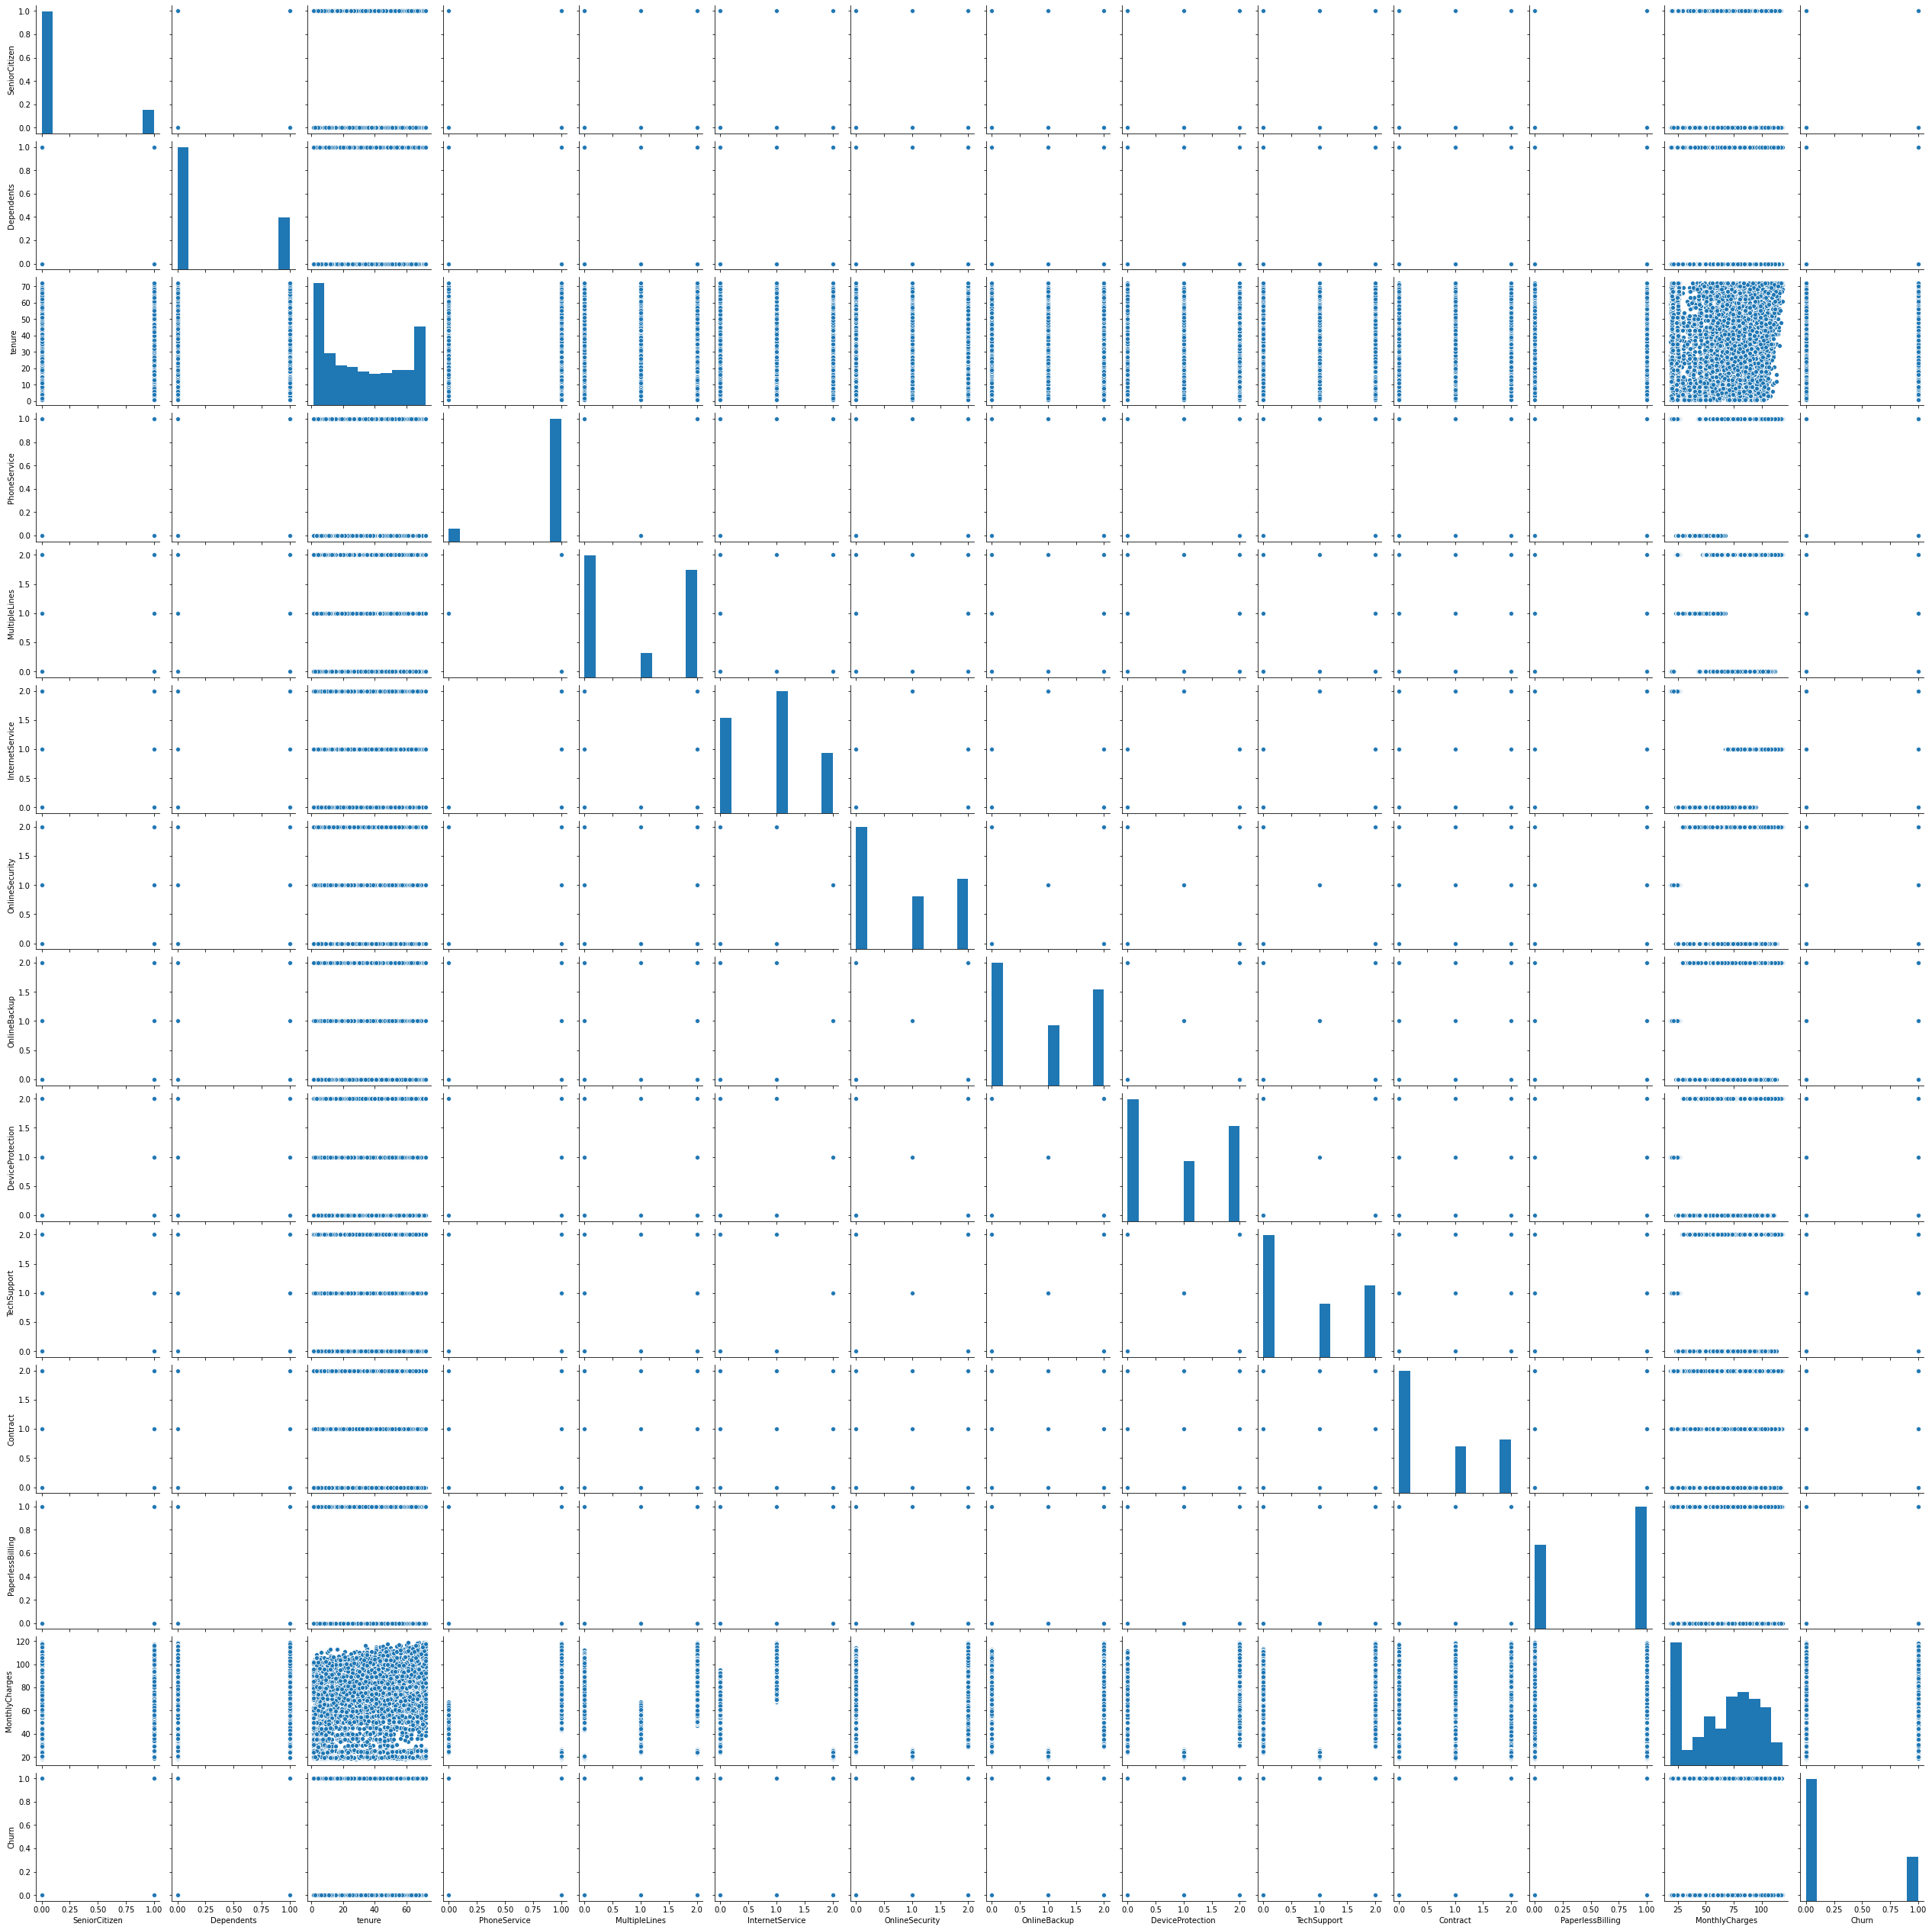

In [172]:
sns.pairplot(df)

In [173]:
#['gender','Partner','StreamingTV','TotalCharges','PaymentMethod','StreamingMovies'] < 0.05

In [ ]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [84]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [85]:
X = sm.add_constant(X)

In [86]:
result = sm.OLS(y,X).fit()

In [87]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:23:39   Log-Likelihood:                -3100.3
No. Observations:                7032   AIC:                             6241.
Df Residuals:                    7012   BIC:                             6378.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2157      0.026      8.144      0.000       0.164       0.268
gender              -0.0039      0.009     -0.436      0.663      -0.022       0.014
SeniorCitizen        0.0500      0.013      3.833      0.000       0.024       0.076
Partner              0.0016      0.011      0.151      0.880      -0.020       0.023
Dependents          -0.0238      0.012     -2.065      0.039      -0.046      -0.001
tenure              -0.0017      0.001     -3.358      0.001      -0.003      -0.001
PhoneService        -0.1360      0.019     -7.028      0.000      -0.174      -0.098
MultipleLines        0.0153      0.006      2.739      0.006       0.004       0.026
InternetService      0.0515      0.008      6.257      0.000       0.035       0.068
OnlineSecurity      -0.0417      0.006     -7.092      0.000      -0.053      -0.030
OnlineBackup        -0.0239      0.006     -4.249      0.000      -0.035      -0.013
DeviceProtection    -0.0170      0.006     -2.922      0.003      -0.028      -0.006
TechSupport         -0.0423      0.006     -7.059      0.000      -0.054      -0.031
StreamingTV         -0.0007      0.006     -0.113      0.910      -0.013       0.011
StreamingMovies  -6.343e-05      0.006     -0.010      0.992      -0.012       0.012
Contract            -0.0425      0.009     -4.998      0.000      -0.059      -0.026
PaperlessBilling     0.0502      0.010      5.007      0.000       0.031       0.070
PaymentMethod        0.0078      0.005      1.705      0.088      -0.001       0.017
MonthlyCharges       0.0058      0.000     17.525      0.000       0.005       0.006
TotalCharges     -5.163e-05   6.46e-06     -7.997      0.000   -6.43e-05    -3.9e-05
==============================================================================
Omnibus:                      404.368   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.545
Skew:                           0.559   Prob(JB):                     2.14e-91
Kurtosis:                       2.581   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
df = df.drop(['gender','Partner','StreamingTV','TotalCharges','PaymentMethod','StreamingMovies'],axis=1)


In [89]:
df

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,29.85,0.0
1,0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,56.95,0.0
2,0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,53.85,1.0
3,0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,42.30,0.0
4,0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,70.70,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,84.80,0.0
7039,0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,103.20,0.0
7040,0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,29.60,0.0
7041,1,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,74.40,1.0


In [90]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [91]:
X = sm.add_constant(X)

In [92]:
result = sm.OLS(y,X).fit()

In [93]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     198.2
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:23:41   Log-Likelihood:                -3133.2
No. Observations:                7032   AIC:                             6294.
Df Residuals:                    7018   BIC:                             6390.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3503      0.018     19.202      0.000       0.315       0.386
SeniorCitizen        0.0515      0.013      3.953      0.000       0.026       0.077
Dependents          -0.0219      0.010     -2.106      0.035      -0.042      -0.002
tenure              -0.0049      0.000    -16.822      0.000      -0.006      -0.004
PhoneService        -0.1312      0.019     -6.933      0.000      -0.168      -0.094
MultipleLines        0.0137      0.006      2.455      0.014       0.003       0.025
InternetService      0.0512      0.008      6.611      0.000       0.036       0.066
OnlineSecurity      -0.0475      0.006     -8.114      0.000      -0.059      -0.036
OnlineBackup        -0.0311      0.006     -5.574      0.000      -0.042      -0.020
DeviceProtection    -0.0231      0.006     -4.030      0.000      -0.034      -0.012
TechSupport         -0.0483      0.006     -8.125      0.000      -0.060      -0.037
Contract            -0.0387      0.008     -4.583      0.000      -0.055      -0.022
PaperlessBilling     0.0510      0.010      5.065      0.000       0.031       0.071
MonthlyCharges       0.0040      0.000     17.839      0.000       0.004       0.004
==============================================================================
Omnibus:                      537.126   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.602
Skew:                           0.536   Prob(JB):                     1.73e-97
Kurtosis:                       2.389   Cond. No.                         401.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
result.resid

0      -0.465797
1      -0.096464
2       0.684251
3      -0.032620
4       0.409327
          ...   
7038   -0.215757
7039   -0.232196
7040   -0.360822
7041    0.325546
7042   -0.097753
Length: 7032, dtype: float64

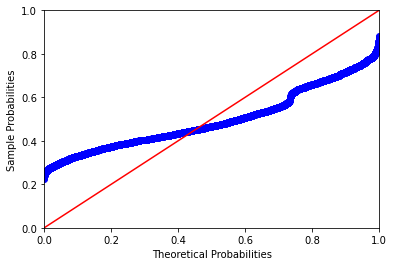

In [95]:
probplot = sm.ProbPlot(result.resid)
probplot.ppplot(line='45')
plt.show()

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [97]:
vif.round(1)


,VIF Factor,features
0,16.4,const
1,1.1,SeniorCitizen
2,1.1,Dependents
3,2.5,tenure
4,1.5,PhoneService
5,1.4,MultipleLines
6,1.6,InternetService
7,1.2,OnlineSecurity
8,1.2,OnlineBackup
9,1.3,DeviceProtection


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
lr_pred = lr.predict(X_test)

In [103]:
lr.score(X_train,y_train)

0.8039414872003251

In [171]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76      1580
         1.0       0.23      0.20      0.21       530

    accuracy                           0.63      2110
   macro avg       0.49      0.49      0.49      2110
weighted avg       0.61      0.63      0.62      2110



In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [114]:
rf_pred = rf.predict(X_test)

In [115]:
rf_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [116]:
rf.score(X_train,y_train)

0.9945144250304754

In [175]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rf_pred)

0.7862559241706161

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1580
         1.0       0.59      0.51      0.54       530

    accuracy                           0.79      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [125]:
X_train.shape

(4922, 14)

In [126]:
model = Sequential()

In [127]:
model.add(Dense(14, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [128]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [129]:
model.fit(x= X_train,y=y_train,epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
154/154 [==============================] - 1s 2ms/step - loss: 2.7108 - val_loss: 0.7071
Epoch 2/300
154/154 [==============================] - 0s 1ms/step - loss: 0.6875 - val_loss: 0.6505
Epoch 3/300
154/154 [==============================] - 0s 1ms/step - loss: 0.6498 - val_loss: 0.6306
Epoch 4/300
154/154 [==============================] - 0s 1ms/step - loss: 0.6291 - val_loss: 0.6151
Epoch 5/300
154/154 [==============================] - 0s 1ms/step - loss: 0.6219 - val_loss: 0.6029
Epoch 6/300
154/154 [==============================] - 0s 1ms/step - loss: 0.6149 - val_loss: 0.5931
Epoch 7/300
154/154 [==============================] - 0s 1ms/step - loss: 0.6003 - val_loss: 0.5855
Epoch 8/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5916 - val_loss: 0.5799
Epoch 9/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5949 - val_loss: 0.5758
Epoch 10/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5918 - val_lo

154/154 [==============================] - 0s 1ms/step - loss: 0.5970 - val_loss: 0.5647
Epoch 82/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5808 - val_loss: 0.5647
Epoch 83/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5763 - val_loss: 0.5647
Epoch 84/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5924 - val_loss: 0.5647
Epoch 85/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5900 - val_loss: 0.5647
Epoch 86/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5736 - val_loss: 0.5647
Epoch 87/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5854 - val_loss: 0.5648
Epoch 88/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5857 - val_loss: 0.5647
Epoch 89/300
154/154 [==============================] - 0s 2ms/step - loss: 0.5811 - val_loss: 0.5647
Epoch 90/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5872 - val_loss: 

Epoch 161/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5830 - val_loss: 0.5648
Epoch 162/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5746 - val_loss: 0.5648
Epoch 163/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5828 - val_loss: 0.5648
Epoch 164/300
154/154 [==============================] - 0s 956us/step - loss: 0.5867 - val_loss: 0.5648
Epoch 165/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5875 - val_loss: 0.5648
Epoch 166/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5843 - val_loss: 0.5648
Epoch 167/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5897 - val_loss: 0.5648
Epoch 168/300
154/154 [==============================] - 0s 986us/step - loss: 0.5788 - val_loss: 0.5648
Epoch 169/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5788 - val_loss: 0.5648
Epoch 170/300
154/154 [==============================] - 0s 1ms/step 

154/154 [==============================] - 0s 1ms/step - loss: 0.5807 - val_loss: 0.5647
Epoch 241/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5885 - val_loss: 0.5647
Epoch 242/300
154/154 [==============================] - 0s 1ms/step - loss: 0.6010 - val_loss: 0.5647
Epoch 243/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5866 - val_loss: 0.5647
Epoch 244/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5762 - val_loss: 0.5648
Epoch 245/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5790 - val_loss: 0.5648
Epoch 246/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5775 - val_loss: 0.5647
Epoch 247/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5761 - val_loss: 0.5648
Epoch 248/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5881 - val_loss: 0.5648
Epoch 249/300
154/154 [==============================] - 0s 1ms/step - loss: 0.5862 - v

In [130]:
model.history.history

{'loss': [1.489554524421692,
  0.674679696559906,
  0.6453152298927307,
  0.6298428773880005,
  0.6178513169288635,
  0.6085053086280823,
  0.6014990210533142,
  0.5963790416717529,
  0.5926976799964905,
  0.5901128649711609,
  0.5883523225784302,
  0.5871742963790894,
  0.5864472389221191,
  0.5859732031822205,
  0.5856941938400269,
  0.5855422019958496,
  0.5854381322860718,
  0.585361897945404,
  0.5853409171104431,
  0.5853222608566284,
  0.5853211283683777,
  0.5853062272071838,
  0.5853000283241272,
  0.5853171348571777,
  0.5852932333946228,
  0.5853027105331421,
  0.5853006839752197,
  0.5852939486503601,
  0.5853044390678406,
  0.5853001475334167,
  0.585299551486969,
  0.5853316783905029,
  0.5853070020675659,
  0.5853085517883301,
  0.5853064060211182,
  0.5853266716003418,
  0.5852951407432556,
  0.5853097438812256,
  0.5853240489959717,
  0.5853021740913391,
  0.5853451490402222,
  0.5853042602539062,
  0.5852977633476257,
  0.5853108763694763,
  0.58531254529953,
  0.5853

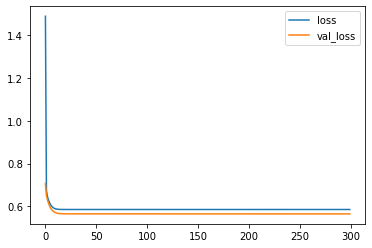

In [131]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [165]:
prediction = model.predict_classes(X_test)
prediction

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Model Evaluation

In [166]:
from sklearn.metrics import classification_report, confusion_matrix

In [170]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1580
         1.0       0.00      0.00      0.00       530

    accuracy                           0.75      2110
   macro avg       0.37      0.50      0.43      2110
weighted avg       0.56      0.75      0.64      2110

[[1580    0]
 [ 530    0]]


### Random Forest classification report

In [169]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1580
         1.0       0.59      0.51      0.54       530

    accuracy                           0.79      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110

[[1390  190]
 [ 261  269]]


### Final Conclusions

### I get accuracy score that is 79% with Random Forest Algorithm.
### Its good result 
## Thank You